In [2]:
from scipy.special import factorial
from scipy.special import comb
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

In [40]:
# Function to create exponential random variable

def RV(num):
    return scipy.stats.expon.rvs(size = num).sum()

In [41]:
def RVsum(n, m):
    RV_list=[]
    i = 0
    while i <= n:
        RV_list.append(RV(m))
        i += 1
    return RV_list

/var/folders/jx/720kx0q96mlcb_x1fp6xngw00000gn/T/ipykernel_52134/3566984795.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


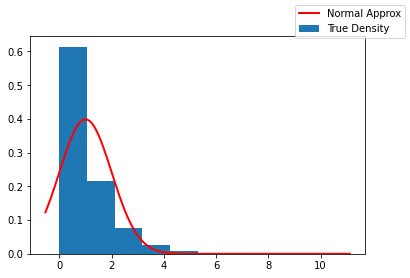

In [76]:
# Plot the density of one exponential RV distribution sample generated above with a overaly of the normal distribution using the 
# mu and std from X~exp.  Not a great approximation to normal

dist1 = RVsum(10000, 1)
mu, std = scipy.stats.norm.fit(dist1)
fig, ax1 = plt.subplots(1,1)
ax1.hist(dist1, density=True, label = "True Density")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = scipy.stats.norm.pdf(x, mu, std)
ax1.plot(x, p, '-r', lw=2, label = "Normal Approx")
fig.legend()
fig.show()


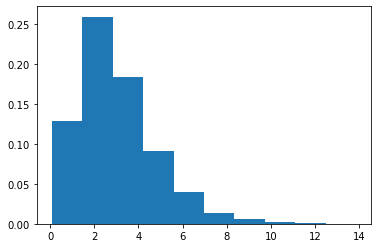

In [77]:
# Now plotting the pdf with 3 samples.  Note, an increasing approximation to normal.

dist2 = RVsum(10000, 3)
hist1 = plt.hist(dist2, density=True)

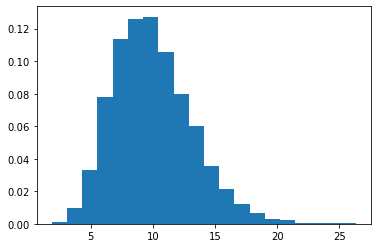

In [78]:
# 10 samples of the exponential RV distribution.  Again, showing the approximation to normal.

dist3 = RVsum(10000, 10)
hist1 = plt.hist(dist3, bins=20, density=True)


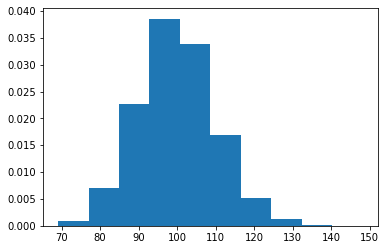

In [79]:
# 100 samples

dist4 = RVsum(10000, 100)
hist1 = plt.hist(dist4, density=True)

In [100]:
# function to general normal distribution

def normLine (a, n1, n2):
    mu, std = scipy.stats.norm.fit(a)
    x = np.linspace(mu-4*std, mu+4*std, 1000)
    p = scipy.stats.norm.pdf(x, mu, std)
    return axs[n1,n2].plot(x, p, '-r', lw=2)


/var/folders/jx/720kx0q96mlcb_x1fp6xngw00000gn/T/ipykernel_52134/991248791.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


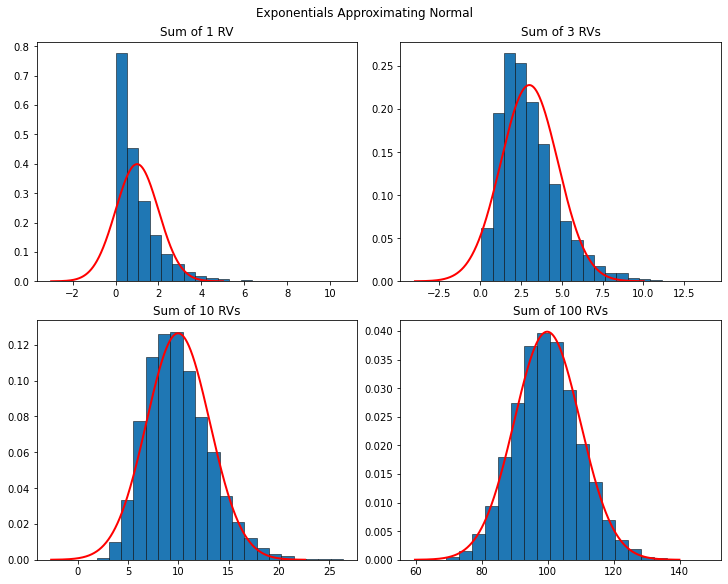

In [106]:
# These subplots show the normal distribution in comparison for the exponential distributions generated above with 
# increasing number of samples.  Note as the number samples increase for X~exp, we appraoch normal.  Central Limit Theorem is 
# an important concept to understand when performing statistical inference on data with different experimental distributions. 

fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(10,8))
fig.suptitle('Exponentials Approximating Normal')

axs[0,0].hist(dist1, bins=20, edgecolor="black", lw=.5, density=True)
normLine(dist1, 0, 0)
axs[0,0].set_title('Sum of 1 RV')

axs[0,1].hist(dist2, bins=20, edgecolor="black", lw=.5, density=True)
normLine(dist2, 0, 1)
axs[0,1].set_title('Sum of 3 RVs')

axs[1,0].hist(dist3, bins=20, edgecolor="black", lw=.5, density=True)
normLine(dist3, 1, 0)
axs[1,0].set_title('Sum of 10 RVs')

axs[1,1].hist(dist4, bins=20, edgecolor="black", lw=.5, density=True)
normLine(dist4, 1, 1)
axs[1,1].set_title('Sum of 100 RVs')

fig.show()